# Imports and Loading

In [1]:
# Imports
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
from IPython.display import Image




In [2]:
# Define Save Paths

# Define the base directory for saving output files
output_base_path = r"C:\Users\kimbe\Documents\StreamingAnalysis\outputs"

# Directories for saving the output files
visualizations_path = os.path.join(output_base_path, "visualizations")
statistics_path = os.path.join(output_base_path, "statistics")
def save_visualization(df, file_name):
    file_path = os.path.join(visualizations_path, file_name)
    df.to_csv(file_path, index=False)
    print(f"Visualization saved to {file_path}")

def save_statistics(df, file_name):
    file_path = os.path.join(statistics_path, file_name)
    df.to_csv(file_path, index=False)
    print(f"Statistics saved to {file_path}")


## Load Datasets and test

In [3]:
# Define the path for the data directory
data_path = r"C:\Users\kimbe\Documents\StreamingAnalysis\outputs"

# Load the comparison data dataframe
comparison_df = pd.read_csv(f"{data_path}\\comparison_data.csv")

# Rename the column 'Unnamed: 0' to 'Platform'
comparison_df.rename(columns={'Unnamed: 0': 'Platform'}, inplace=True)

# Display the dataframe
comparison_df


,Platform,High-Rated Content (%),Exclusivity (%),Average Rating (Exclusive Titles),Cost-Effectiveness (per Title),Cancellation Rate (%),Genre-Specific Analysis
0,Amazon,11.24,93.29,5.79,0.0059,26.9,Niche: Documentary (Top 2)
1,Apple,16.92,76.68,6.59,0.0055,15.2,Niche: Documentary (Top 1)
2,HBO,32.16,94.16,6.47,0.0206,10.2,"Niche: Action, Comedy, Drama, Science Fiction ..."
3,Hulu,26.56,85.56,6.31,0.0252,9.0,"Niche: Action, Comedy, Drama (Top 2)"
4,Netflix,19.61,92.43,6.92,0.0115,4.9,"Niche: Action, Comedy, Drama, Science Fiction ..."


# Introduction

In this notebook, we will leverage visualizations, statistical analyses, and summary metrics to explore and evaluate the value offered by popular streaming platforms: **Amazon Prime Video, Apple TV+, HBO Max, Hulu, and Netflix**. The goal is to provide actionable insights and recommendations for consumers and stakeholders by answering the following questions:

* Which platform offers the highest percentage of high-rated content (IMDb ≥ 7.5)?
* How do platforms compare in terms of exclusivity and overlap?
* What is the cost-effectiveness of high-rated and exclusive titles?
* Are there genre-specific strengths among the platforms?
* What combination of platforms provides the best value while minimizing overlap?


This notebook is structured into the following sections:

* **Statistical Tests**: ANOVA, correlation analyses, and regression models to assess significant differences and relationships.
* **Visualizations**: Bar charts, heatmaps, scatter plots, and more to illustrate platform comparisons.
* **Recommendations**: Actionable insights based on the findings, including single-platform and multi-platform subscription suggestions.
* **Conclusion**: A summary of results and implications.

# Visualizations
*Code for bar charts, scatter plots, and heatmaps*

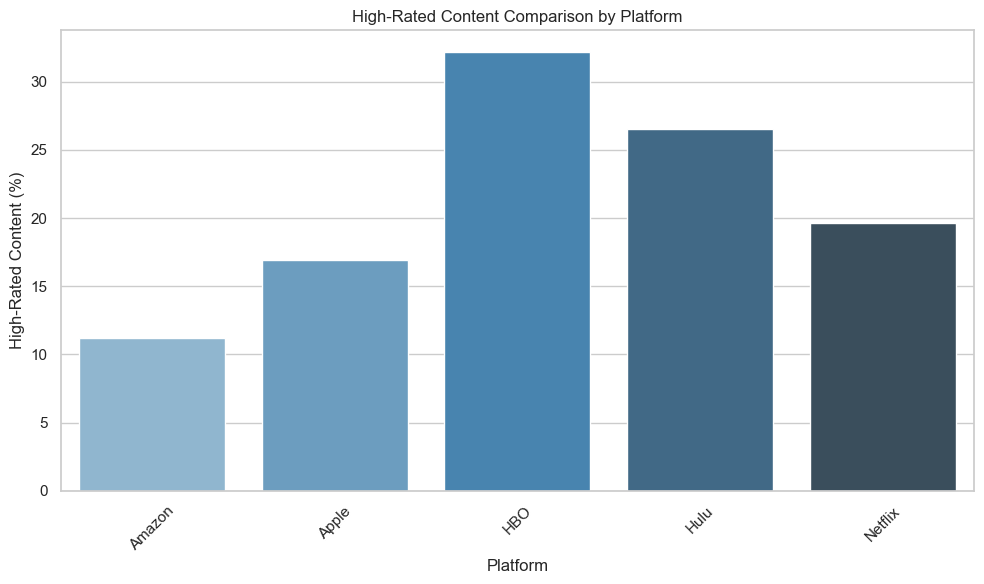

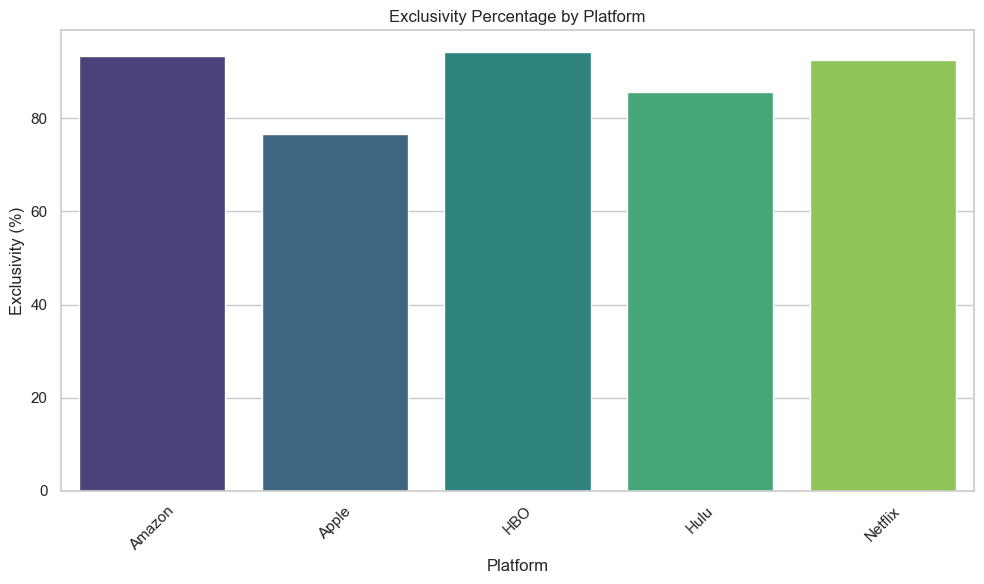

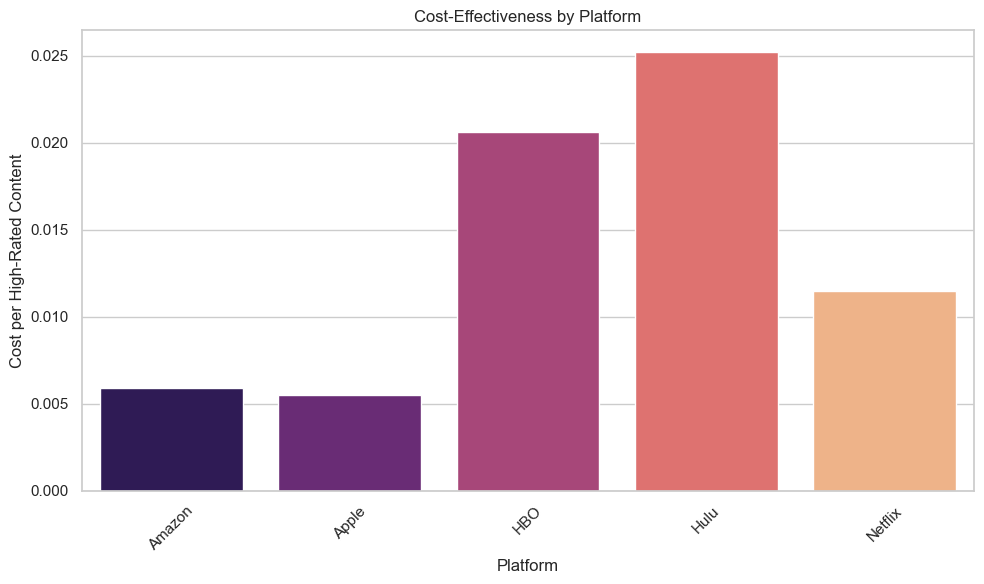

In [13]:
# Set up the Seaborn style
sns.set_theme(style="whitegrid")

# Bar plot for High-Rated Content (%)
plt.figure(figsize=(10, 6))
sns.barplot(x='Platform', y='High-Rated Content (%)', data=comparison_df, palette="Blues_d", hue = 'Platform')
plt.title('High-Rated Content Comparison by Platform')
plt.xlabel('Platform')
plt.ylabel('High-Rated Content (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig(os.path.join(visualizations_path, "High_rated_content_percent.png"))
plt.show()
plt.close()

# Bar plot for Exclusivity (%)
plt.figure(figsize=(10, 6))
sns.barplot(x='Platform', y='Exclusivity (%)', data=comparison_df, palette="viridis", hue = 'Platform')
plt.title('Exclusivity Percentage by Platform')
plt.xlabel('Platform')
plt.ylabel('Exclusivity (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig(os.path.join(visualizations_path, "percent_of_exclusive_titles.png"))
plt.show()
plt.close()

# Bar plot for Cost-Effectiveness (per Title)
plt.figure(figsize=(10, 6))
sns.barplot(x='Platform', y='Cost-Effectiveness (per Title)', data=comparison_df, palette="magma", hue = 'Platform')
plt.title('Cost-Effectiveness by Platform')
plt.xlabel('Platform')
plt.ylabel('Cost per High-Rated Content')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig(os.path.join(visualizations_path, "cost_effectiveness.png"))
plt.show()
plt.close()


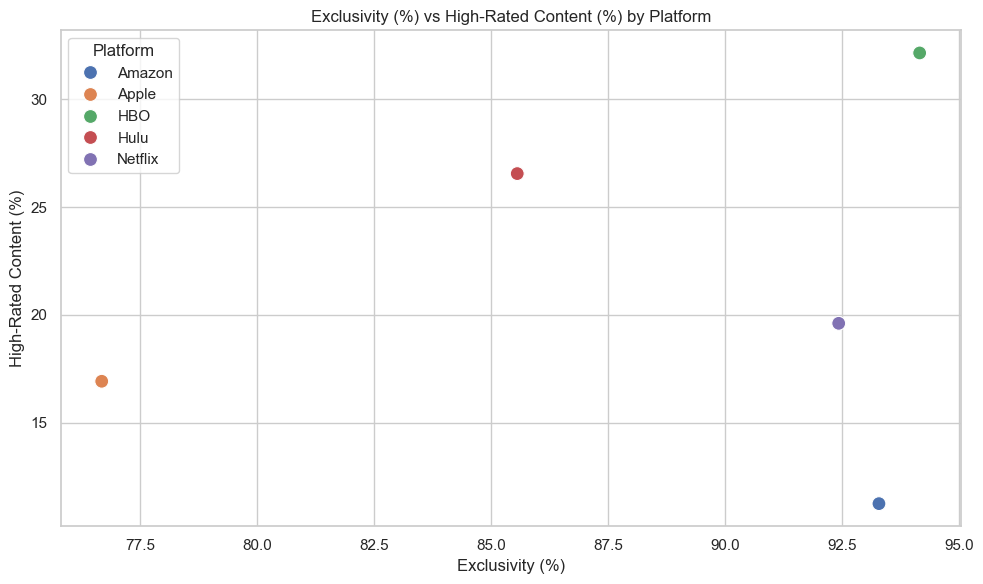

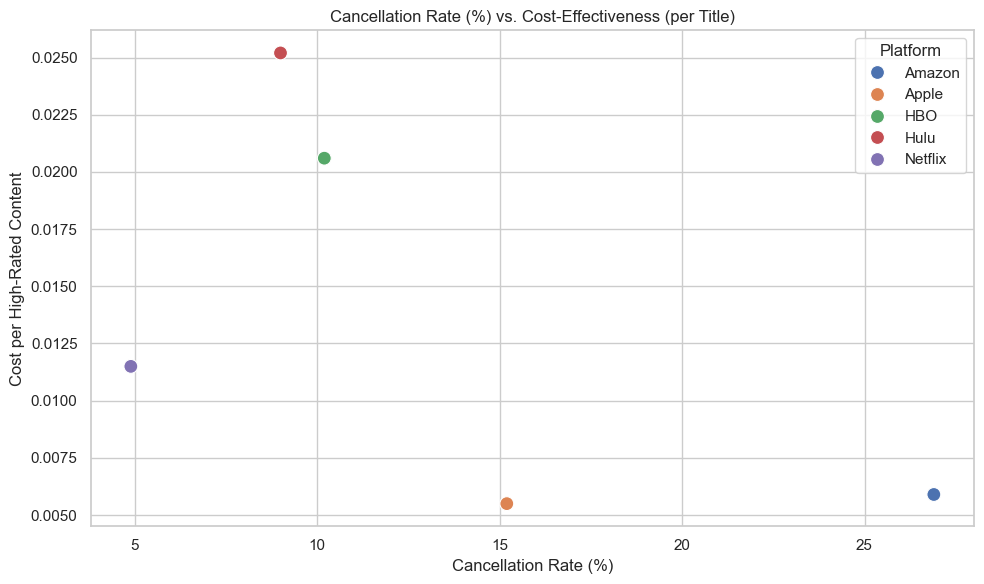

In [14]:
# Scatter plot for Exclusivity (%) vs High-Rated Content (%)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Exclusivity (%)', y='High-Rated Content (%)', data=comparison_df, hue='Platform', palette="deep", s=100)
plt.title('Exclusivity (%) vs High-Rated Content (%) by Platform')
plt.xlabel('Exclusivity (%)')
plt.ylabel('High-Rated Content (%)')
plt.legend(title='Platform')
plt.tight_layout()
plt.savefig(os.path.join(visualizations_path, "exclusive_percent_vs_high_rated_content_percent.png"))
plt.show()
plt.close()

# Scatter plot between Cancellation Rate (%) and Cost-Effectiveness (per Title)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Cancellation Rate (%)', y='Cost-Effectiveness (per Title)', data=comparison_df, hue='Platform', palette="deep", s=100)
plt.title('Cancellation Rate (%) vs. Cost-Effectiveness (per Title)')
plt.xlabel('Cancellation Rate (%)')
plt.ylabel('Cost per High-Rated Content')
plt.tight_layout()
plt.savefig(os.path.join(visualizations_path, "cancellation_rate_percent_vs_cost_effictiveness.png"))
plt.show()
plt.close()


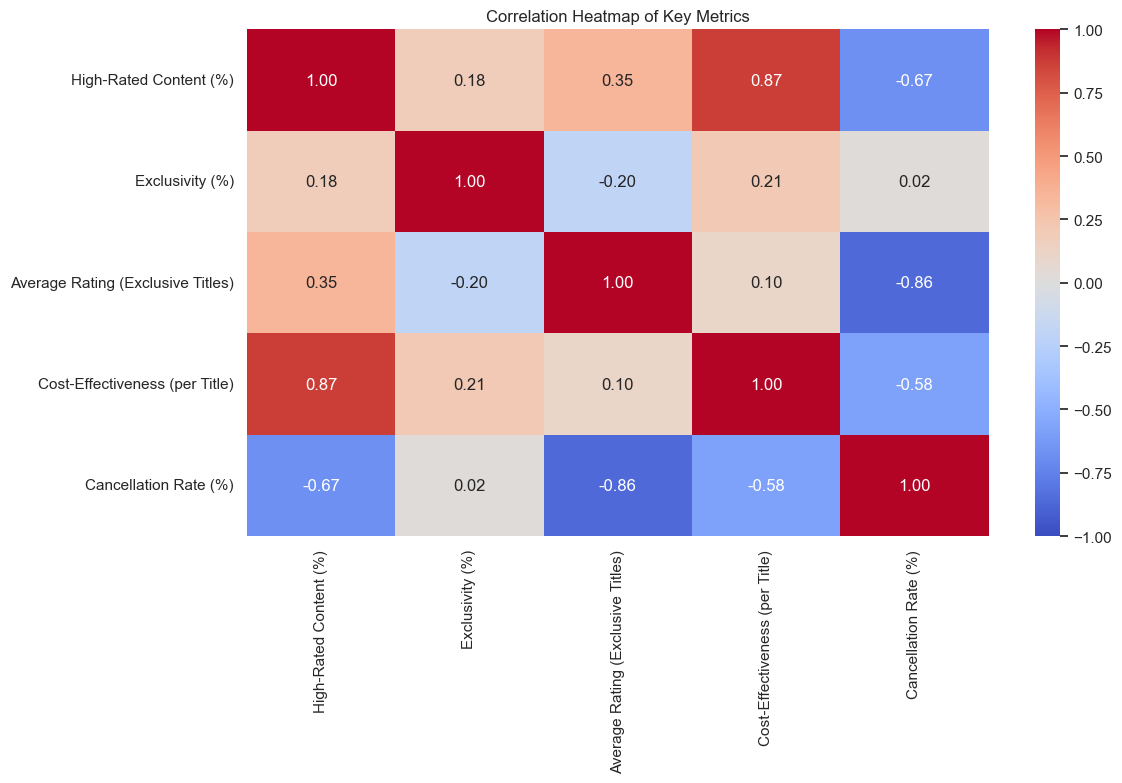

In [15]:
# Correlation heatmap between all numeric columns
plt.figure(figsize=(12, 8))
correlation_matrix = comparison_df[['High-Rated Content (%)', 'Exclusivity (%)', 
                                    'Average Rating (Exclusive Titles)', 
                                    'Cost-Effectiveness (per Title)', 
                                    'Cancellation Rate (%)']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", cbar=True, vmin=-1, vmax=1)
plt.title('Correlation Heatmap of Key Metrics')
plt.tight_layout()
plt.savefig(os.path.join(visualizations_path, "correlation_heatmap.png"))
plt.show()
plt.close()


# Statistical Tests
*ANOVA, Correlation Analysis, Regression models*

# Recommendations
*Key takeaways and suggestions for platform choices based on the analysis*

# Conclusion
*Final thoughts and any future steps or analysis.*